In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Початкові параметри
K = 7
B = 0
N = 10000

In [13]:
X = np.linspace(0, 10, N)
noise = np.random.normal(0, 4, N)
Y = K * X + B + noise

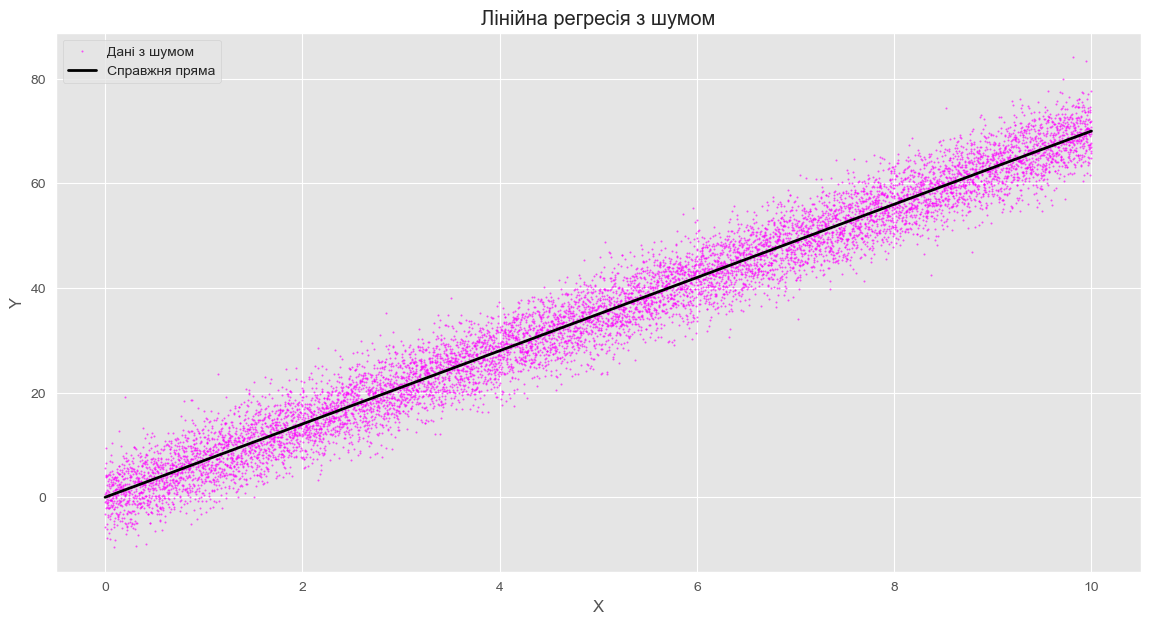

In [14]:
plt.style.use('ggplot')

# Візуалізація даних з шумом та справжньої прямої
plt.figure(figsize=(14, 7))
plt.scatter(X, Y, s=1, color='magenta', alpha=0.5, label='Дані з шумом')
plt.plot(X, K * X + B, color='black', linewidth=2, label='Справжня пряма')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лінійна регресія з шумом')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_X = np.sum(x * x)
    
    K_hat1 = (n * sum_xy - sum_x * sum_y) / (n * sum_X - sum_x ** 2)
    B_hat1 = (sum_y - K_hat1 * sum_x) / n
    
    return K_hat1, B_hat1

K_hat, B_hat = least_squares_method(X, Y)

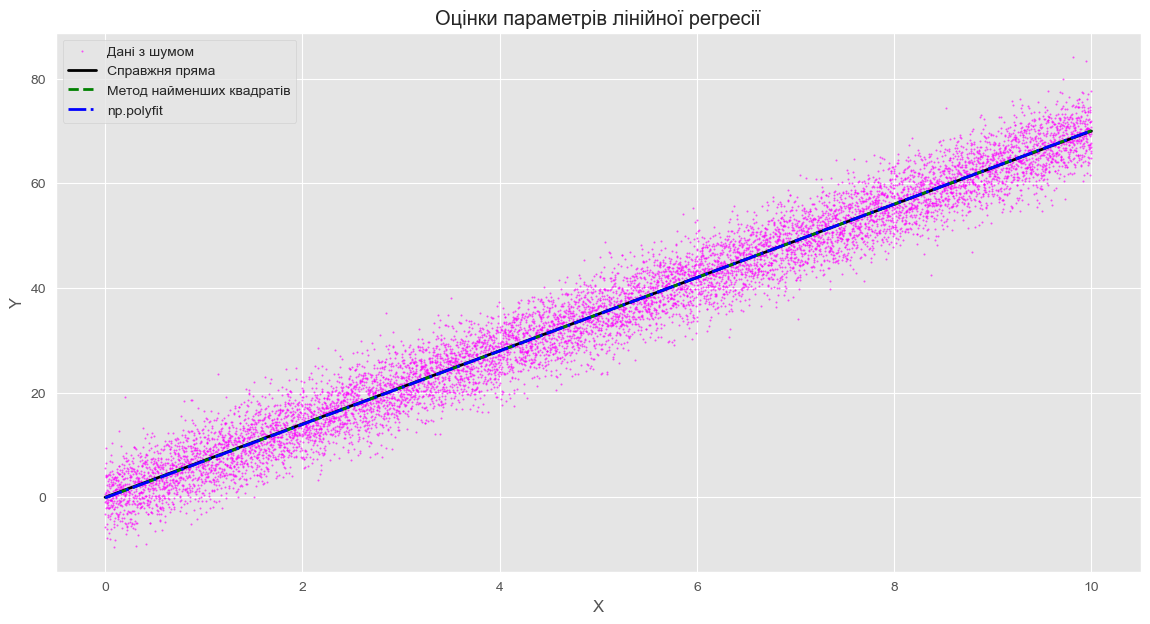

In [16]:
coefficients = np.polyfit(X, Y, 1)
K_np_polyfit = coefficients[0]
B_np_polyfit = coefficients[1]

# Візуалізація оцінок різними методами
plt.figure(figsize=(14, 7))
plt.scatter(X, Y, s=1, color='magenta', alpha=0.5, label='Дані з шумом')
plt.plot(X, K * X + B, color='black', linewidth=2, label='Справжня пряма')
plt.plot(X, K_hat * X + B_hat, color='green', linestyle='--', linewidth=2, label='Метод найменших квадратів')
plt.plot(X, K_np_polyfit * X + B_np_polyfit, color='blue', linestyle='-.', linewidth=2, label='np.polyfit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Оцінки параметрів лінійної регресії')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("Параметри справжньої прямої:")
print(f"K = {K}")
print(f"B = {B}")
print("\nОцінки параметрів за методом найменших квадратів:")
print(f"K_hat = {K_hat}")
print(f"B_hat = {B_hat}")
print("\nОцінки параметрів за np.polyfit:")
print(f"K_np_polyfit = {K_np_polyfit}")
print(f"B_np_polyfit = {B_np_polyfit}")

Параметри справжньої прямої:
K = 7
B = 0

Оцінки параметрів за методом найменших квадратів:
K_hat = 7.018184486869393
B_hat = -0.1172333115719026

Оцінки параметрів за np.polyfit:
K_np_polyfit = 7.018184486869387
B_np_polyfit = -0.11723331157187648


In [18]:
def gradient_descent(x, y, learning_rate, n_iter):
    K_hat = 7
    B_hat = 7
    n = len(x)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    for _ in range(n_iter):
        y_pred = K_hat * x + B_hat
        gradient_K = (-2/n) * np.sum(x * (y - y_pred))
        gradient_B = (-2/n) * np.sum(y - y_pred)
        
        K_hat -= learning_rate * gradient_K
        B_hat -= learning_rate * gradient_B
    
    return K_hat, B_hat

learning_rate = 0.01
n_iter = 100
K_gradient, B_gradient = gradient_descent(X, Y, learning_rate, n_iter)

print(f"K_gradient = {K_gradient}, B_gradient = {B_gradient}")

K_gradient = 6.3739355306314645, B_gradient = 4.14647121113746


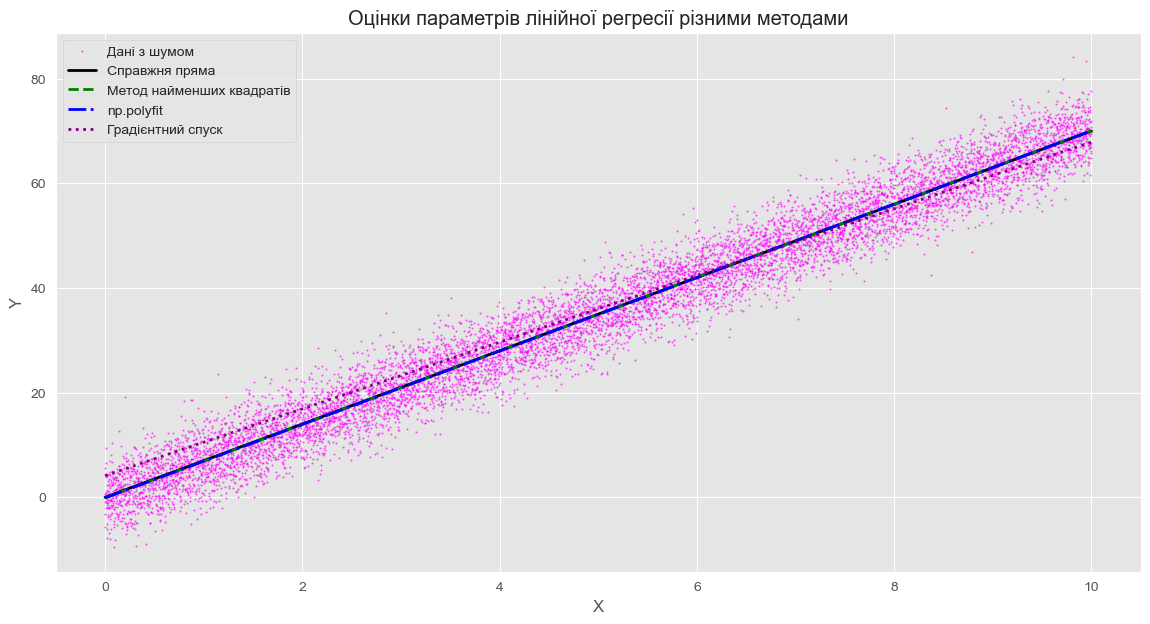

In [19]:
plt.figure(figsize=(14, 7))
plt.scatter(X, Y, s=1, color='magenta', alpha=0.5, label='Дані з шумом')
plt.plot(X, K * X + B, color='black', linewidth=2, label='Справжня пряма')
plt.plot(X, K_hat * X + B_hat, color='green', linestyle='--', linewidth=2, label='Метод найменших квадратів')
plt.plot(X, K_np_polyfit * X + B_np_polyfit, color='blue', linestyle='-.', linewidth=2, label='np.polyfit')
plt.plot(X, K_gradient * X + B_gradient, color='purple', linestyle=':', linewidth=2, label='Градієнтний спуск')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Оцінки параметрів лінійної регресії різними методами')
plt.legend()
plt.grid(True)
plt.show()

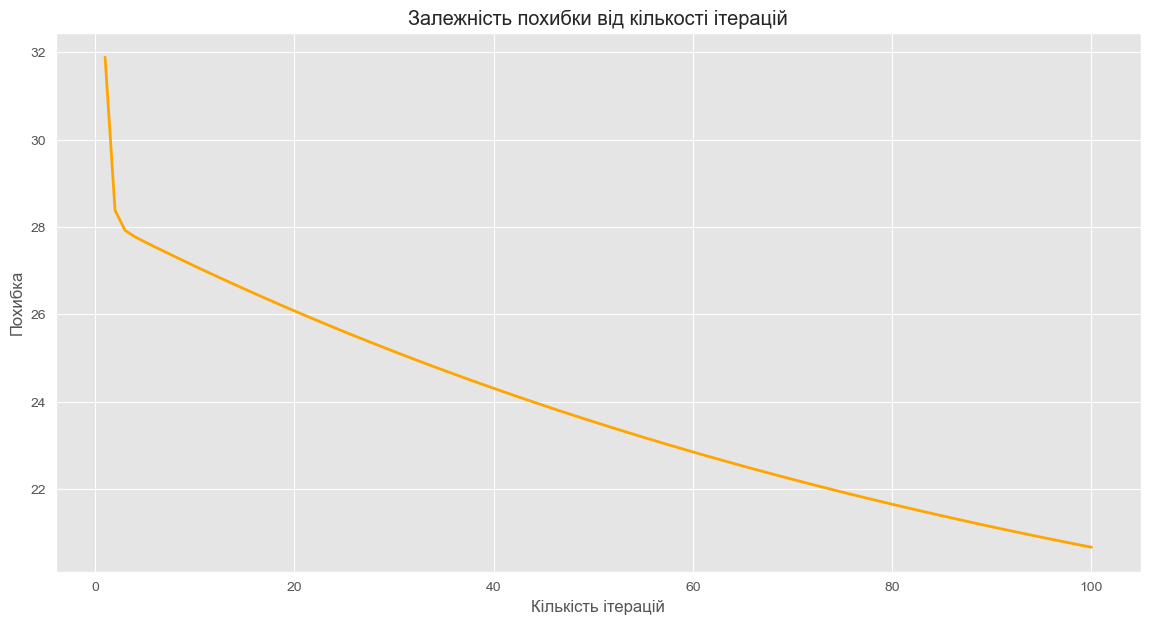

In [20]:
def loss_function(x, y, K, B):
    y_pred = K * x + B
    return np.mean((y_pred - y) ** 2)

# Графік похибки в залежності від кількості ітерацій
errors = []
iterations = range(1, n_iter + 1)
for i in iterations:
    K_gradient, B_gradient = gradient_descent(X, Y, learning_rate, i)
    error = loss_function(X, Y, K_gradient, B_gradient)
    errors.append(error)

plt.figure(figsize=(14, 7))
plt.plot(iterations, errors, color='orange', linewidth=2)
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()